# importing necessary libraries for the visualization(matplotlib,seaborn),and training (using scikitlearn also known as sklearn,numpy...etc) and many more

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline 
import time 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from PIL import Image
from bs4 import BeautifulSoup 
from selenium import webdriver  
import networkx as nx 
import pickle
import warnings
warnings.filterwarnings('ignore')

# loading the csv file in the phish_data variable using pandas 

In [3]:
phish_data = pd.read_csv('phishing_site_urls.csv')
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


# some basic math here (like checking the nullable coloumns,info of csv file,and count of good(Non-phishing) and bad(phishing ) website urls

In [4]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [5]:
phish_data.isnull().sum()

URL      0
Label    0
dtype: int64

In [8]:
label_counts = pd.DataFrame(phish_data.Label.value_counts())
label_counts

,Label
good,392924
bad,156422


# plotting the graph using Matplotlib

<AxesSubplot: ylabel='Label'>

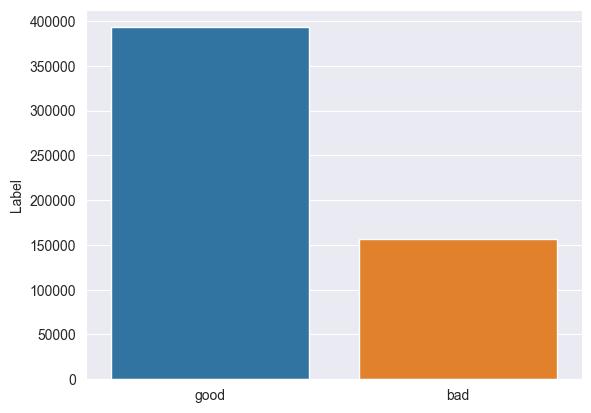

In [6]:
sns.set_style('darkgrid')
sns.barplot(x=label_counts.index,y=label_counts.Label)

# Tokenizing the urls into individual Tokens and joining them to main coloumn

In [10]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [11]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [12]:
tokenizer.tokenize(phish_data.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [13]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 4.038531799989869 sec


In [15]:
phish_data.sample(5)

,URL,Label,text_tokenized
15267,rekrims.com/PLO5XIde/webscr_prim.php?cmVrcmltc...,bad,"[rekrims, com, PLO, XIde, webscr, prim, php, c..."
11570,www.archeus.ro/lingvistica/AdaugareDiacriticeO...,bad,"[www, archeus, ro, lingvistica, AdaugareDiacri..."
304562,cinemagora.co.uk/genre-10-comedy-drama.html,good,"[cinemagora, co, uk, genre, comedy, drama, html]"
403643,newegg.com/Store/SubCategory.aspx?SubCategory=...,good,"[newegg, com, Store, SubCategory, aspx, SubCat..."
248668,topics.myfoxboston.com/m/43666249/deadly-crash...,good,"[topics, myfoxboston, com, m, deadly, crash, o..."


In [16]:
stemmer = SnowballStemmer("english") 

In [17]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 71.31298089999473 sec


In [20]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
380626,lyricsmania.com/the_walking_wounded_lyrics_bay...,good,"[lyricsmania, com, the, walking, wounded, lyri...","[lyricsmania, com, the, walk, wound, lyric, ba...",lyricsmania com the walk wound lyric baysid html
310562,criterion.com/films/341-alexander-nevsky,good,"[criterion, com, films, alexander, nevsky]","[criterion, com, film, alexand, nevski]",criterion com film alexand nevski
127327,101.127.58.71/wordpress/wer/index.php,bad,"[wordpress, wer, index, php]","[wordpress, wer, index, php]",wordpress wer index php
78450,www.research.att.com/sw/tools/yoix/,good,"[www, research, att, com, sw, tools, yoix]","[www, research, att, com, sw, tool, yoix]",www research att com sw tool yoix
521145,www.lucianojesse.com/music/post.php,bad,"[www, lucianojesse, com, music, post, php]","[www, lucianojess, com, music, post, php]",www lucianojess com music post php


# Reducing  the Tokens Length by Removing stems and extracting root word from it and attaches it to main column

In [19]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.40452330000698566 sec


In [21]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
357227,ilike.com/artist/Terence+Blanchard/track/Over+...,good,"[ilike, com, artist, Terence, Blanchard, track...","[ilik, com, artist, terenc, blanchard, track, ...",ilik com artist terenc blanchard track over there
390153,mma-core.com/fighter_photos/_Miguel_Torres?fpi...,good,"[mma, core, com, fighter, photos, Miguel, Torr...","[mma, core, com, fighter, photo, miguel, torr,...",mma core com fighter photo miguel torr fpid
410784,oup.co.uk/oxed/children/oise/sites/people/,good,"[oup, co, uk, oxed, children, oise, sites, peo...","[oup, co, uk, oxe, children, ois, site, peopl]",oup co uk oxe children ois site peopl
382305,manlyweb.com/women/playmates/pmom1990.html,good,"[manlyweb, com, women, playmates, pmom, html]","[manlyweb, com, women, playmat, pmom, html]",manlyweb com women playmat pmom html
456911,usgennet.org/usa/il/county/warren/1903_history...,good,"[usgennet, org, usa, il, county, warren, histo...","[usgennet, org, usa, il, counti, warren, histo...",usgennet org usa il counti warren histori warr...


In [22]:
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [23]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [24]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [25]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 

# Training the data by Using Logistic Regression And MultinomialNB and their results and Dumping those results in a pickle  

In [26]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

In [27]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

In [28]:
cv = CountVectorizer()

In [29]:
help(CountVectorizer())

Help on CountVectorizer in module sklearn.feature_extraction.text object:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts.
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----

In [30]:
feature = cv.fit_transform(phish_data.text_sent)

In [31]:
feature[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

In [33]:
lr = LogisticRegression()

In [35]:
lr.fit(trainX,trainY)
lr

LogisticRegression()

In [36]:
lr.score(testX,testY)

0.9645397817048574

In [37]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9782626107682114
Testing Accuracy : 0.9645397817048574

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36864
        Good       0.99      0.96      0.98    100473

    accuracy                           0.96    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


<AxesSubplot: >

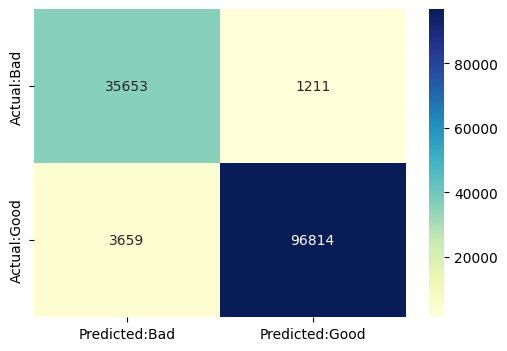

In [38]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [39]:
mnb = MultinomialNB()

In [40]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [41]:
mnb.score(testX,testY)

0.9573093922249649

In [42]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9740224121317739
Testing Accuracy : 0.9573093922249649

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.94      0.92     38365
        Good       0.97      0.97      0.97     98972

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<AxesSubplot: >

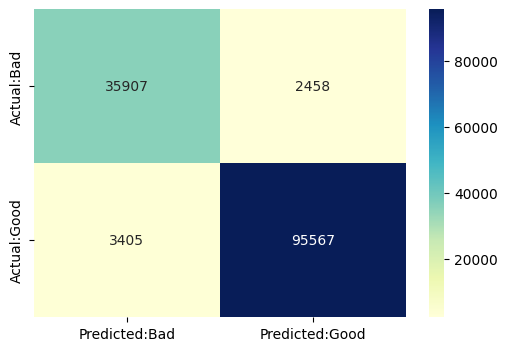

In [43]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<AxesSubplot: ylabel='Accuracy'>

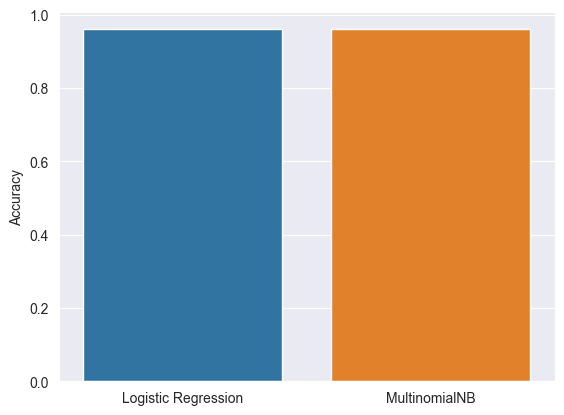

In [44]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(x=acc.index,y=acc.Accuracy)

In [45]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [46]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [47]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [48]:
pipeline_ls.score(testX,testY) 

0.9651441345012634

Training Accuracy : 0.9799713113063064
Testing Accuracy : 0.9651441345012634

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36623
        Good       0.99      0.96      0.98    100714

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<AxesSubplot: >

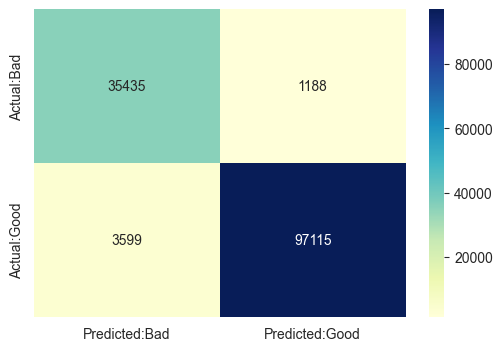

In [53]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [54]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [55]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9651441345012634


In [57]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtue.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
